C:\Users\nitip\anaconda3\Lib\site-packages\sklearn\impute\_base.py:555: UserWarning: Skipping features without any observed values: [2]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


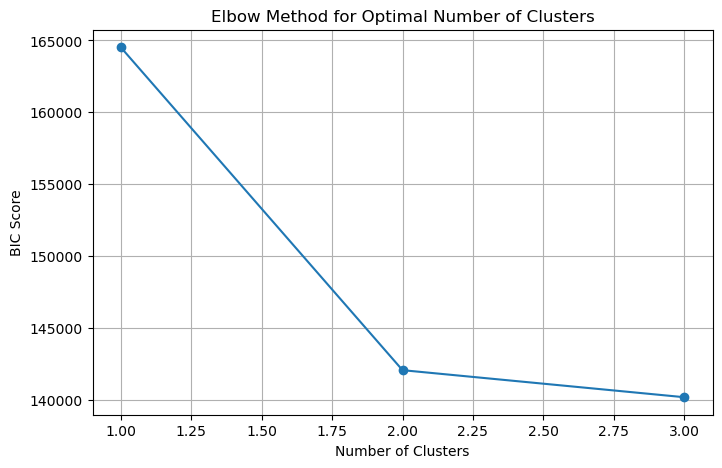

Optimal number of clusters: 3
Silhouette Score: 0.8422203120835753
Training Data - Cluster Assignments: [0 0 0 ... 2 1 0]


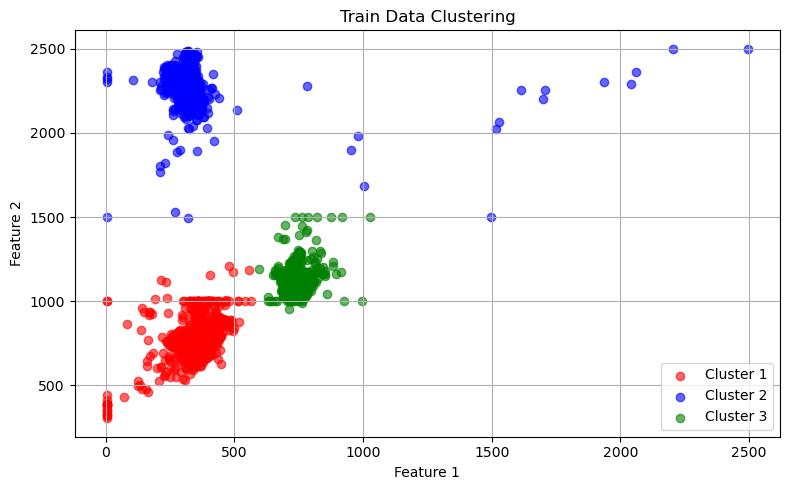

GMM model saved as 'gmm_model.pkl'.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import joblib

# Load datasets
class1 = pd.read_csv(r'C:\Users\nitip\OneDrive\Desktop\dec2024\Group04[1]\Group04\rd_group4\class1.txt', delimiter=' ', header=None)
class2 = pd.read_csv(r'C:\Users\nitip\OneDrive\Desktop\dec2024\Group04[1]\Group04\rd_group4\class2.txt', delimiter=' ', header=None)
class3 = pd.read_csv(r'C:\Users\nitip\OneDrive\Desktop\dec2024\Group04[1]\Group04\rd_group4\class3.txt', delimiter=' ', header=None)

# Combine datasets into a single array
data = np.vstack([class1.values, class2.values, class3.values])

# Handle missing values by replacing NaN with the mean of each column
imputer = SimpleImputer(strategy='mean')  # Replace NaN with mean
data = imputer.fit_transform(data)  # Apply imputation

# Train-test split function
def train_test_split(data, test_size=0.2):
    test_count = int(len(data) * test_size)
    np.random.shuffle(data)
    test_data = data[:test_count]
    train_data = data[test_count:]
    return train_data, test_data

# Split data into train and test sets
train_data, test_data = train_test_split(data, test_size=0.2)

# Determine optimal number of clusters using Elbow method (BIC)
scores = []
k_range = range(1, 4)
for k in k_range:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(train_data)
    scores.append(gmm.bic(train_data))  # Using BIC score for evaluation

# Plot Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(k_range, scores, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('BIC Score')
plt.grid(True)
plt.show()

# Automatically select optimal k based on BIC scores
optimal_k = k_range[np.argmin(scores)]
print(f'Optimal number of clusters: {optimal_k}')

# Fit GMM Model using optimal clusters
gmm = GaussianMixture(n_components=optimal_k, random_state=42)
gmm.fit(train_data)

# Predict cluster assignments for training data
train_clusters = gmm.predict(train_data)

# Calculate silhouette score for training data
silhouette_avg = silhouette_score(train_data, train_clusters)
print(f'Silhouette Score: {silhouette_avg}')

# Plot clusters function
def plot_clusters(data, clusters, title):
    colors = ['red', 'blue', 'green', 'purple', 'orange']
    data = np.array(data)  # Ensure data is a numpy array
    
    # If data is high-dimensional, reduce it to 2D for plotting
    if data.shape[1] > 2:
        pca = PCA(n_components=2)
        data = pca.fit_transform(data)

    plt.figure(figsize=(8, 5))
    for i in range(optimal_k):
        cluster_points = data[clusters == i]
        if cluster_points.size == 0:  # Skip empty clusters
            continue
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], color=colors[i % len(colors)], label=f'Cluster {i+1}', alpha=0.6)

    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Output results and plot clusters
print("Training Data - Cluster Assignments:", train_clusters)
plot_clusters(train_data, train_clusters, title='Train Data Clustering')

# Save the trained GMM model to a file
joblib.dump(gmm, 'gmm_model.pkl')
print("GMM model saved as 'gmm_model.pkl'.")